In [1]:
import local_models.local_models
import local_models.algorithms
import local_models.utils
import local_models.linear_projections
import local_models.loggin
import local_models.TLS_models
from local_models.plotting_utils import mayavi_plt_pts
from local_models.tf_quadric_models import *
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import sklearn.datasets
import sklearn.decomposition
import logging
import ml_battery.log
import time
import os
import mayavi
import mayavi.mlab
import string
import subprocess
import functools
import cv2
import itertools
from local_models.quadric_models import *
from local_models.plotting_utils import *
import joblib


#on headless systems, tmux: "Xvfb :1 -screen 0 1280x1024x24 -auth localhost", then "export DISPLAY=:1" in the jupyter tmux
mayavi.mlab.options.offscreen = True



logger = logging.getLogger(__name__)

#reload(local_models.local_models)
#reload(lm)
#reload(local_models.loggin)
#reload(local_models.TLS_models)
np.warnings.filterwarnings('ignore')


/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
FRESH=True

In [3]:
kernel_names = {
    local_models.local_models.GaussianKernel: 'gaussian',
    local_models.local_models.TriCubeKernel: 'tricube'
}

In [4]:
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [5]:
example_data = np.loadtxt("/home/brown/disk2/shapenet/train_data/02691156/000176.pts")

In [6]:
example_data.shape

(2552, 3)

In [7]:
np.std(example_data,axis=0)

array([0.15554406, 0.03679307, 0.11109593])

In [8]:
#scale the data.... having underflow errors
example_data = example_data*1/np.min(np.std(example_data, axis=0))

In [9]:
np.std(example_data,axis=0)

array([4.22753651, 1.        , 3.01947946])

In [10]:
KERNEL=local_models.local_models.TriCubeKernel
RUN = 11
ALPHA=1.5 #curvatures
BETA=0. #offsets
GAMMA=0. #intercept
ETA=1.5 #direction
ZETA=1. #point

#subsample_rate = 0.005
K=30
kernel=KERNEL(bandwidth="knn", k=K)

project_dir = "../data/shapenet_{}_{:03d}".format(kernel_names[KERNEL], RUN)

os.makedirs(project_dir, exist_ok=1)

In [11]:
def local_odq_shift_parallel(unfitted_quadric_models, fit_data, predict_data, 
    iterations=100, kernel=None, batch_size=100, n_jobs=32, previous_beta0=False, model_updater=None, return_params=False):
    
    base_batch = np.array([0,batch_size])
    n_batches = predict_data.shape[0]/batch_size

    slicers = [slice(*(base_batch + batch_size*n)) for n in range(int(np.ceil(n_batches)))]

    iterated_predictionses = joblib.Parallel(n_jobs=n_jobs, verbose=100)(joblib.delayed(local_odq_shift_unfitted)(
                unfitted_quadric_models,
                fit_data,
                predict_data[slicer],
                iterations=iterations,
                kernel=kernel,
                previous_beta0=previous_beta0,
                model_updater=model_updater,
                return_params=return_params,
                identifier=slicer
            )
            for slicer in slicers
        )
    logger.info("finished")
    return iterated_predictionses

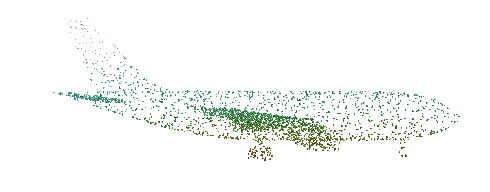

In [12]:
mayavi_plt_pts(example_data)

In [13]:
with fuckit("nothing to del"):
    TFQuadricSesh.close()
with fuckit("nothing to del"):
    del TFQuadricSesh 
with fuckit("nothing to del"):
    del TFQuadricGraph 
with fuckit("nothing to del"):
    del local_models.tf_quadric_models.TFQuadricSesh
with fuckit("nothing to del"):
    del local_models.tf_quadric_models.TFQuadricGraph

nothing to del
nothing to del
nothing to del
nothing to del
nothing to del


In [14]:
parabolic_model = TFParabolic(n_epochs=5000, log_epochs=0.01, weighted=True)

building!
Tensor("quadric_regression/quadric_projection/transpose_1:0", shape=(3, 3), dtype=complex128)
Tensor("quadric_regression/quadric_projection/matmul_1:0", shape=(?, 3), dtype=complex128)
Tensor("quadric_regression/quadric_projection/matmul_2:0", shape=(1, 3), dtype=complex128)
L,U,UL,UR,BR Tensor("quadric_regression/quadric_projection/GatherV2_1:0", shape=(3,), dtype=complex128) Tensor("quadric_regression/quadric_projection/GatherV2_2:0", shape=(3, 3), dtype=complex128) Tensor("quadric_regression/quadric_projection/GatherV2_1:0", shape=(3,), dtype=complex128) Tensor("quadric_regression/quadric_projection/add_2:0", shape=(?, 3), dtype=complex128) Tensor("quadric_regression/quadric_projection/add_4:0", shape=(?, 1), dtype=complex128)
args0 Tensor("quadric_regression/quadric_projection/cond/strided_slice_2:0", shape=(?, 1), dtype=complex128)
(?, 1)
args1 Tensor("quadric_regression/quadric_projection/cond/strided_slice_3:0", shape=(?, 1), dtype=complex128)
(?, 1)
args2 Tensor("quad

special_pts Tensor("quadric_regression/quadric_projection/cond_1/Merge:0", shape=(?, 3), dtype=complex128)
Tensor("quadric_regression/training/optimizer/update_quadric_regression/quadric_projection/flattened_quadric/parabolic_constraint/GatherV2_1:0", shape=(3,), dtype=float64)
Tensor("quadric_regression/training/optimizer/update_quadric_regression/quadric_projection/flattened_quadric/parabolic_constraint/concat_3:0", shape=(3,), dtype=float64)
(4, 4)


In [15]:
local_quadrics = local_models.local_models.LocalModels(parabolic_model)

In [16]:
local_quadrics.fit(example_data)

In [ ]:
with joblib.parallel_backend("loky", n_jobs=8):
    quadric_params = local_quadrics.transform(example_data, k=kernel.k, kernel=kernel, weighted=True,
        parallel=True)

In [ ]:
quadric_params.shape

In [ ]:
import importlib; importlib.reload(local_models.quadric_models)
import local_models.quadric_models

In [ ]:
TRIU_INDICES4 = np.triu_indices(4)
def featurify_param_vectors(X,P,alpha=1.,beta=1.,gamma=1.,eta=1.,zeta=1.):
    #alpha, beta, gamma, eta and zeta are the relative weights of: 
    #alpha :: curvature, 
    #beta  :: offset of parabola vertex from point
    #gamma :: some combo of total offset and intercept
    #eta   :: direction of parabola
    #zeta  :: original points
    rearranged = np.zeros((P.shape[0], 4, 4))
    rearranged[:,TRIU_INDICES4[0], TRIU_INDICES4[1]] = P
    rearranged[:,TRIU_INDICES4[1], TRIU_INDICES4[0]] = P
    Ls, Us, ULs, URs, BRs = map(np.empty, ((P.shape[0],3), (P.shape[0],3,3), (P.shape[0],3), (P.shape[0],1,3), (P.shape[0],1,1)))
    for i, Q in enumerate(rearranged):
        x = X[i:i+1]
        Q_s = Q[:-1,:-1]
        L, U = np.linalg.eigh(Q_s)
        
        #easy indexing is row-wise, so we transpose U for now
        U = U.T
        
        absL_sorter = np.argsort(np.abs(L), axis=-1)
        L = L[absL_sorter]
        U = U[absL_sorter]
        
        non0L_sorter = np.argsort(L[1:], axis=-1)
        L[1:] = L[1:][non0L_sorter]
        U[1:] = U[1:][non0L_sorter]
        
        #untranspose U from before
        U = U.T
        
        #there is a zero eig.... find it
        
        UTQs = U.T@Q_s
        UL = L
        UR = x@UTQs.T + Q[-1:,:-1]@U
        BR = np.einsum('kj,kj->k', x@Q_s, x).reshape(-1,1) + 2*x@Q[-1:,:-1].T + Q[-1,-1]
        
        
        Ls[i], Us[i], ULs[i], URs[i], BRs[i] = L, U, UL, UR, BR

    #return Us, ULs, URs, BRs
    features = np.concatenate((alpha*ULs[:,1:], beta*URs[:,0,:], gamma*BRs[:,0], eta*Us[:,:,0], zeta*X), axis=1)
    return features
    

In [ ]:
features = featurify_param_vectors(example_data, quadric_params, 
    alpha=ALPHA, beta=BETA, gamma=GAMMA, eta=ETA, zeta=ZETA)
features.shape

In [ ]:
mean_model = local_models.local_models.TLS_models.Mean()
mean_models = local_models.local_models.LocalModels(mean_model)
mean_models.fit(features)

In [ ]:
average_nn_dist = np.mean(mean_models.index.query(features, k=2, return_distance=True)[0][:,1])
average_nn_dist

In [ ]:
kernel = local_models.local_models.GaussianKernel(bandwidth=2*average_nn_dist)

In [ ]:
shifter = local_models.algorithms.mean_shift(mean_models, features, iterations=200, kernel=kernel)

In [ ]:
start = time.time()
for i, shift in enumerate(shifter): print(i)

In [ ]:
print("meanshift time: {}".format((time.time() - start)/60/60))

In [ ]:
blah = local_models.local_models.LocalModels(mean_model)
blah.fit(shift)
what = blah.index.query_radius(shift, r=average_nn_dist/10, return_distance=True)[0]

In [ ]:
blah.index.query_radius(shift, r=average_nn_dist/10, return_distance=True)

In [ ]:
what

In [ ]:
np.unique(np.array(list(map(np.sum, what))), return_index=True)

In [ ]:
def unique(arr_of_arr):
    sorted_arr_of_arr = []
    for arr in arr_of_arr:
        sorted_arr_of_arr.append(np.sort(arr))
    unique_arr_of_arr = []
    for arr in sorted_arr_of_arr:
        isunique = True
        for uarr in unique_arr_of_arr:
            if len(uarr) != len(arr): continue
            same = True
            for i in range(len(arr)):
                if arr[i] != uarr[i]: 
                    same = False
                    break
            if same:
                isunique = False
                break
        if isunique:
            unique_arr_of_arr.append(arr)
    return unique_arr_of_arr

In [ ]:
unique(what)

In [ ]:
import collections
cluster_map = collections.defaultdict(list)
for j, cluster in enumerate(unique(what)):
    for i in cluster:
        cluster_map[i].append(j)

In [ ]:
cluster_map_lens = list(map(lambda x: len(cluster_map[x]), cluster_map))
max(cluster_map_lens)

In [ ]:
cluster_arr = np.array([cluster_map[i][0] for i in sorted(cluster_map)])

In [ ]:
np.unique(cluster_arr, return_counts=True)

In [ ]:
pts = example_data

In [ ]:
import importlib
import local_models.plotting_utils
importlib.reload(local_models.plotting_utils)
from local_models.plotting_utils import *

In [ ]:
figure = mayavi.mlab.figure(figure=None, bgcolor=(1,1,1), fgcolor=(0,0,0), engine=None, size=(1000, 1000))
focus = np.average(pts, axis=0)
dist = np.std(pts, axis=0)

nodes = mayavi.mlab.points3d(pts[:,0], pts[:,1], pts[:,2],
                             scale_mode='scalar', scale_factor=1,
                             colormap='gist_rainbow', figure=figure, vmin=0, vmax=7)
nodes.glyph.scale_mode = 'scale_by_vector'
#sizes
nodes.mlab_source.dataset.point_data.vectors = np.ones((pts.shape[0],3))*(np.average(dist)/20)
#colors
nodes.mlab_source.dataset.point_data.scalars = cluster_arr


In [ ]:
pth = os.path.join(project_dir, 
    "plane_clusters_r{:03d}_a{:.03f}_b{:.03f}_g{:.03f}_e{:.03f}_z{:.03f}.png".format(
        RUN,ALPHA,BETA,GAMMA,ETA,ZETA))

In [ ]:
normalize_view(figure, focus, dist, azimuth=45, elevation=-65, roll=15)
mayavi.mlab.savefig(pth, figure=figure, magnification=2)
mayavi.mlab.clf(figure)
mayavi.mlab.close(figure)

In [ ]:
imshow(pth, trim_border=True)